In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

Tamaño imagen: (288, 287) pix
Tamaño imagen: (288, 287) pix


<Figure size 640x480 with 0 Axes>

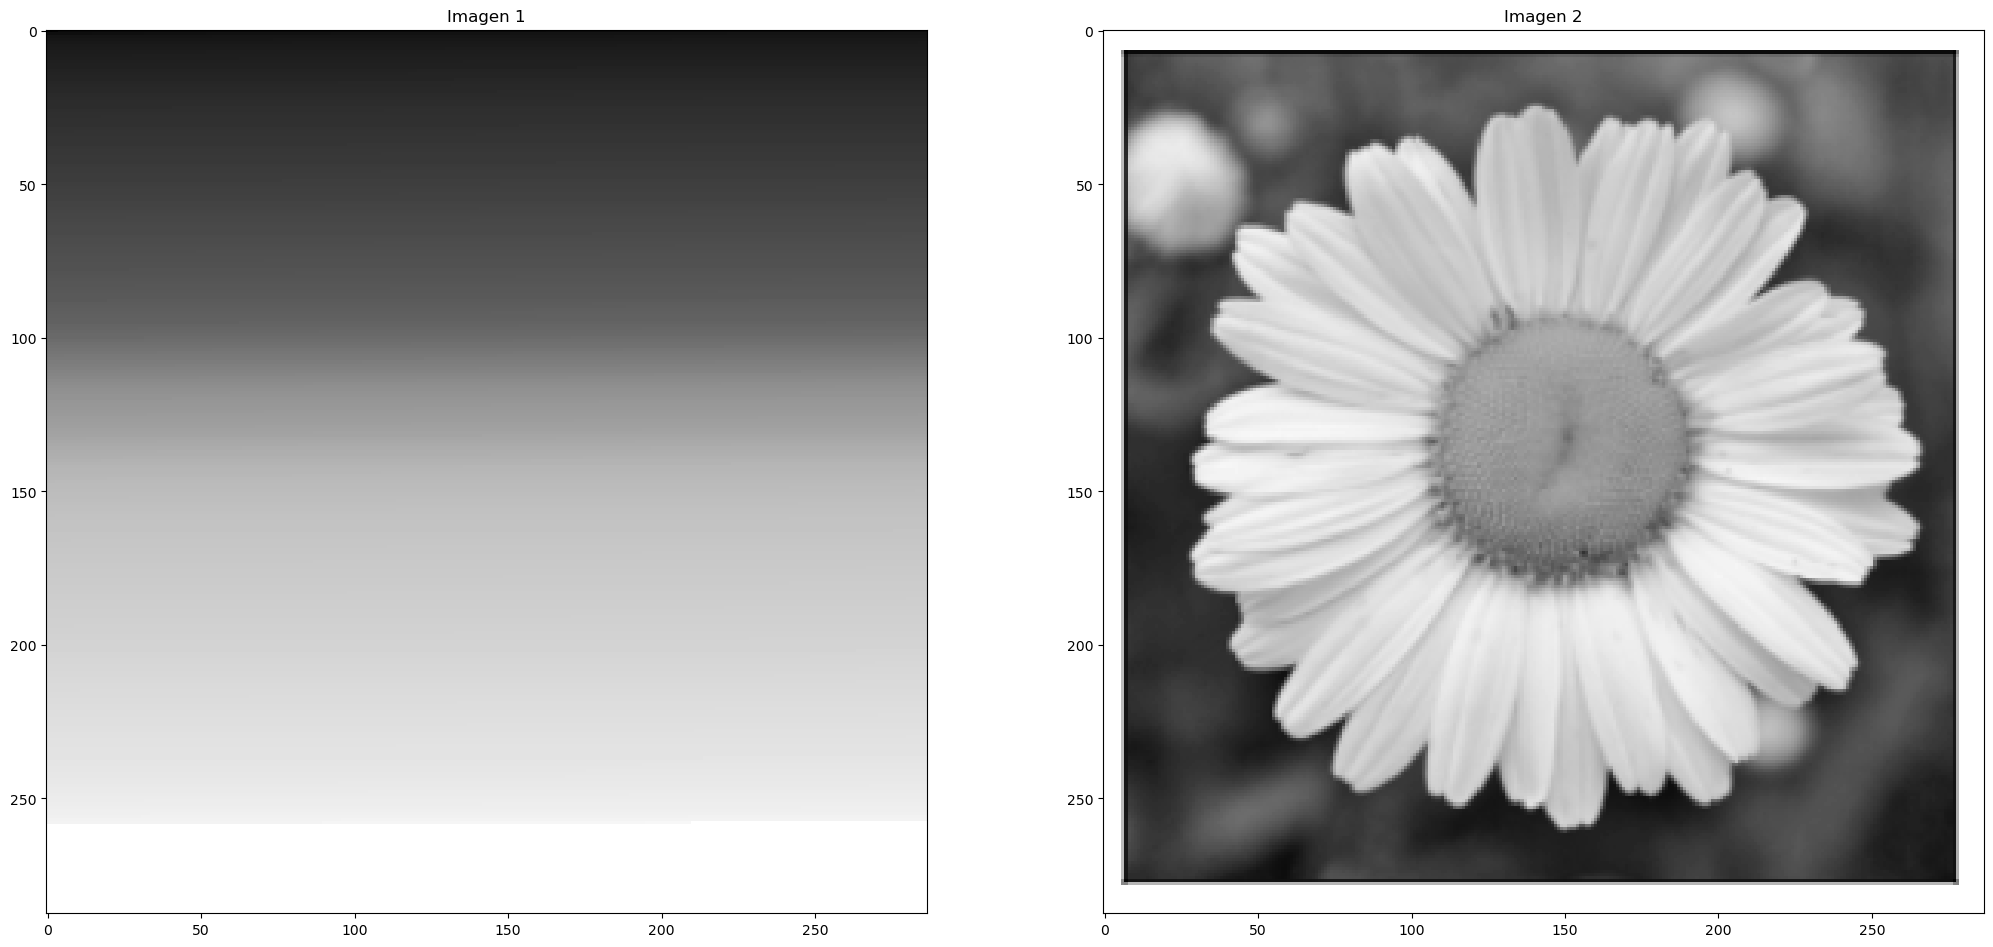

In [6]:
# Cargar una imagen en modo monocromático (un canal)
img_1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img_2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)


# Vemos los tamaños de las imágenes
print(f'Tamaño imagen: {img_1.shape} pix')
print(f'Tamaño imagen: {img_2.shape} pix')


# Graficamos las imagenes que cargamos
plt.figure()
fig, splt = plt.subplots(1,2,figsize=(25,25)) 
splt[0].imshow(img_1, cmap='gray', vmin=0, vmax=255),   
splt[0].set_title('Imagen 1')
splt[1].imshow(img_2, cmap='gray', vmin=0, vmax=255),
splt[1].set_title('Imagen 2')  
plt.show()

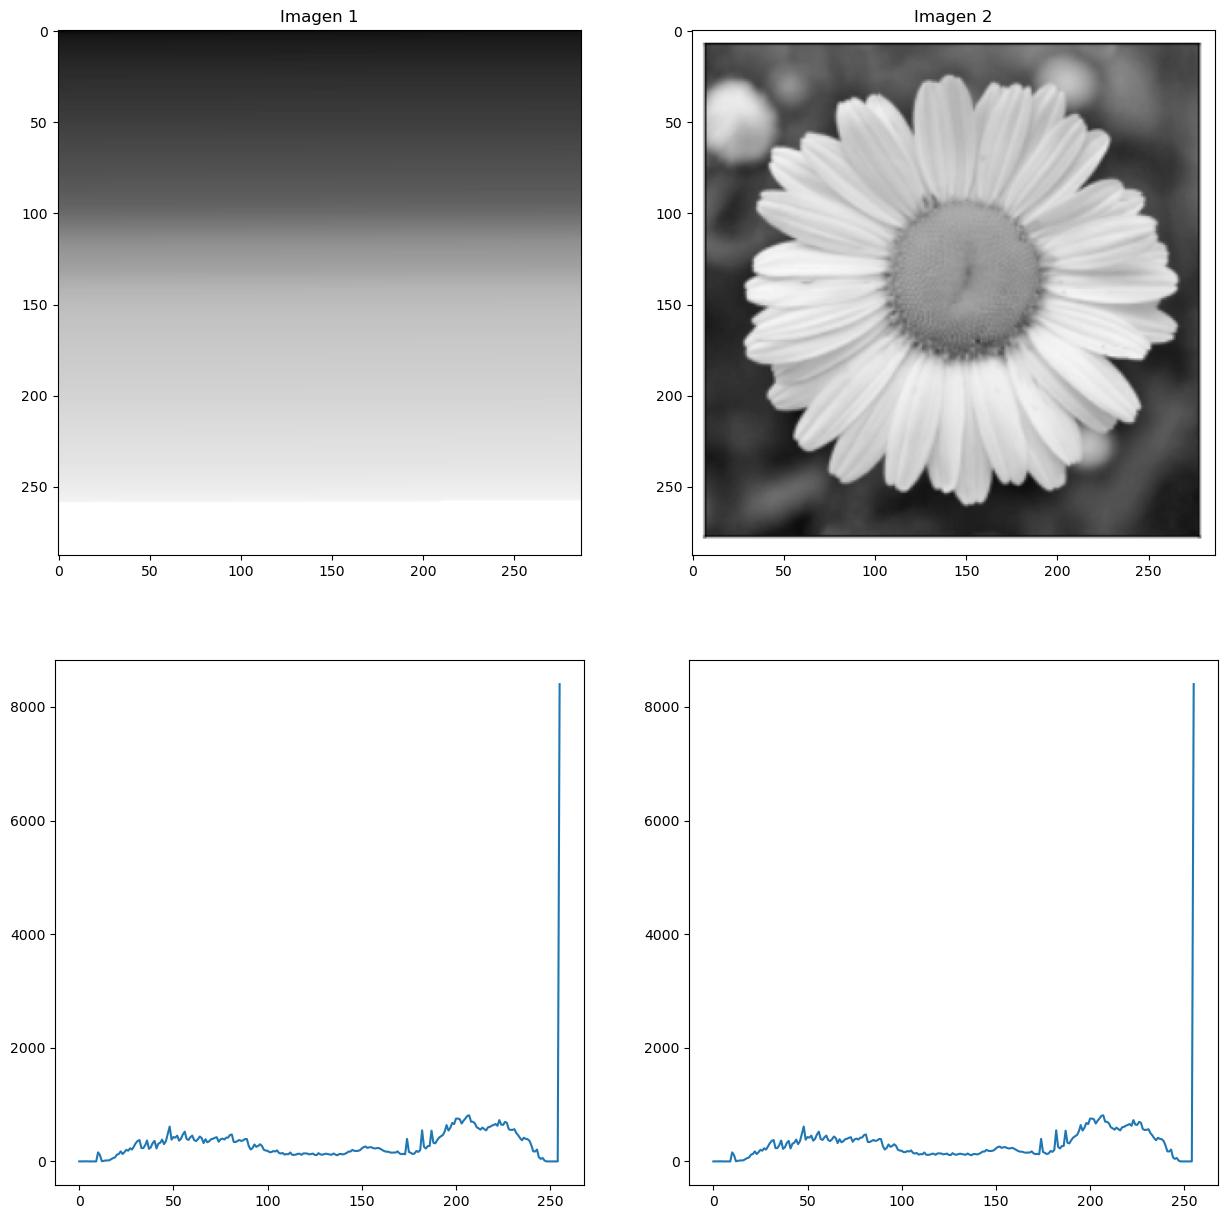

In [9]:
# Nueva figura
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
# Imagen 1
ax1=plt.subplot(221)
ax1.imshow(img_1, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Imagen 1')

hist1,bins1 = np.histogram(img_1.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# Imagen 2
ax2=plt.subplot(222)
ax2.imshow(img_2, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Imagen 2')

hist2,bins2 = np.histogram(img_2.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

plt.show()


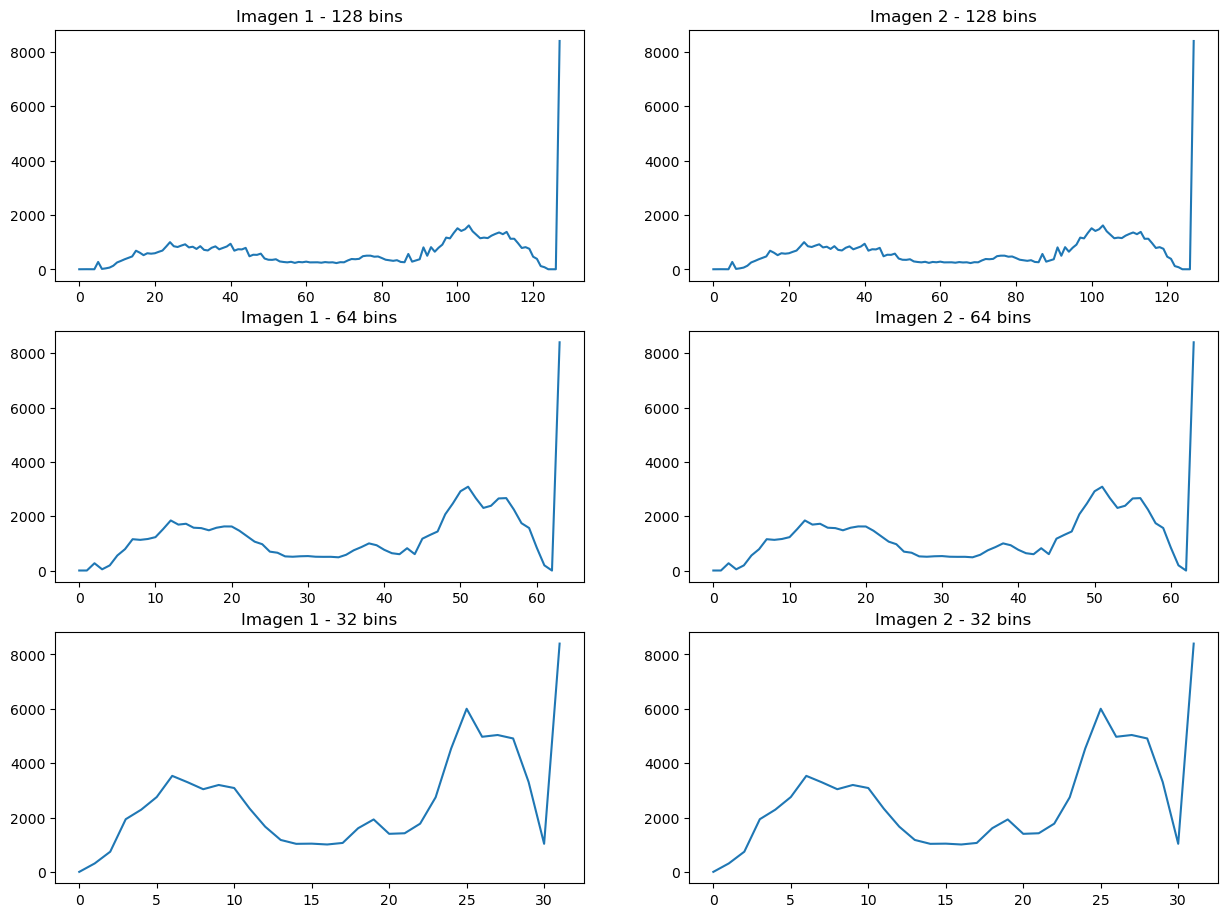

In [14]:
# Variacion de bins en el histograma para detectar posibles cambios.

# Nueva figura
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# Imagen 1
hist1,bins1 = np.histogram(img_1.ravel(),128,[0,256])
ax1=plt.subplot(421)
ax1.set_title('Imagen 1 - 128 bins')
ax1.plot(hist1)

hist3,bins3 = np.histogram(img_1.ravel(),64,[0,256])
ax3=plt.subplot(423)
ax3.set_title('Imagen 1 - 64 bins')
ax3.plot(hist3)

hist5,bins5 = np.histogram(img_1.ravel(),32,[0,256])
ax5=plt.subplot(425)
ax5.set_title('Imagen 1 - 32 bins')
ax5.plot(hist5)

# Imagen 2
hist2,bins2 = np.histogram(img_2.ravel(),128,[0,256])
ax2=plt.subplot(422)
ax2.set_title('Imagen 2 - 128 bins')
ax2.plot(hist2)

hist4,bins4 = np.histogram(img_2.ravel(),64,[0,256])
ax4=plt.subplot(424)
ax4.set_title('Imagen 2 - 64 bins')
ax4.plot(hist4)

hist6,bins6 = np.histogram(img_2.ravel(),32,[0,256])
ax5=plt.subplot(426)
ax5.set_title('Imagen 2 - 32 bins')
ax5.plot(hist6)

plt.show()


## Conclusión

Tamaño imagen: (628, 953, 3) pix


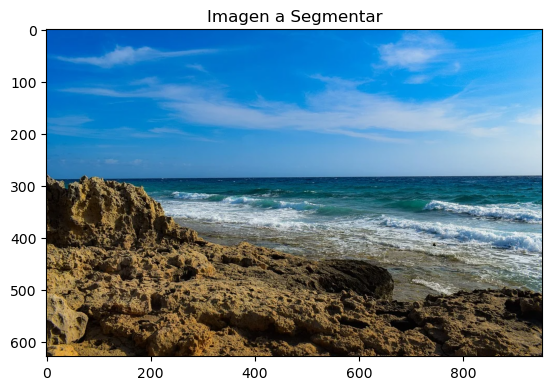

In [21]:
# Cargar imagen
img_segment = cv.imread('segmentacion.png')

# Transformamos a RGB
imgRGB = cv.cvtColor(img_segment, cv.COLOR_BGR2RGB)

# Vemos los tamaños de las imágenes
print(f'Tamaño imagen: {img_segment.shape} pix')# Cargar imagenes para aplicar pasaje a coordenadas cromaticas

plt.figure()
plt.title('Imagen a Segmentar')
plt.imshow(imgRGB),   
plt.show()

<Figure size 640x480 with 0 Axes>

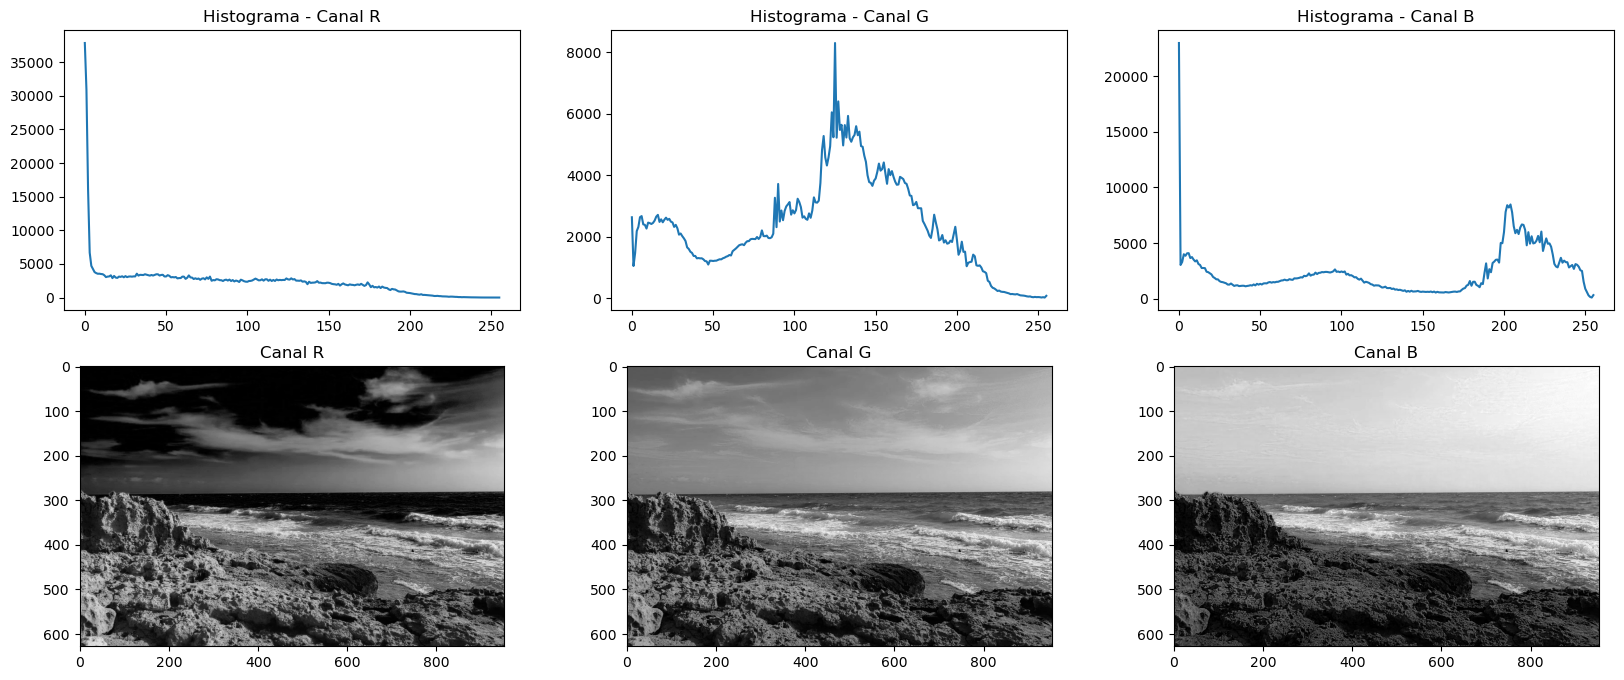

In [40]:
# Analisis de los histogramas de los tres canales y grafico de cada uno de ellos en escala de grises. 

im_r, im_g, im_b = cv.split(imgRGB)

plt.figure()
fig, s_plots = plt.subplots(2,3,figsize=(20,8)) 

hist_r,bins_r = np.histogram(im_r.ravel(),256,[0,256])
s_plots[0,0].set_title('Histograma - Canal R')
s_plots[0,0].plot(hist_r)

hist_g,bins_g = np.histogram(im_g.ravel(),256,[0,256])
s_plots[0,1].set_title('Histograma - Canal G')
s_plots[0,1].plot(hist_g)

hist_b,bins_b = np.histogram(im_b.ravel(),256,[0,256])
s_plots[0,2].set_title('Histograma - Canal B')
s_plots[0,2].plot(hist_b)

s_plots[1,0].imshow(im_r,cmap='gray')
s_plots[1,0].set_title('Canal R')

s_plots[1,1].imshow(im_g,cmap='gray')
s_plots[1,1].set_title('Canal G')

s_plots[1,2].imshow(im_b,cmap='gray')
s_plots[1,2].set_title('Canal B')

plt.show()


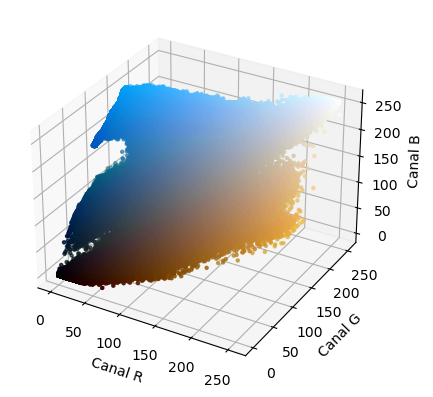

In [45]:

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(im_r.flatten(), im_g.flatten(), im_b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal R")
axis.set_ylabel("Canal G")
axis.set_zlabel("Canal B")
plt.show()

<Figure size 640x480 with 0 Axes>

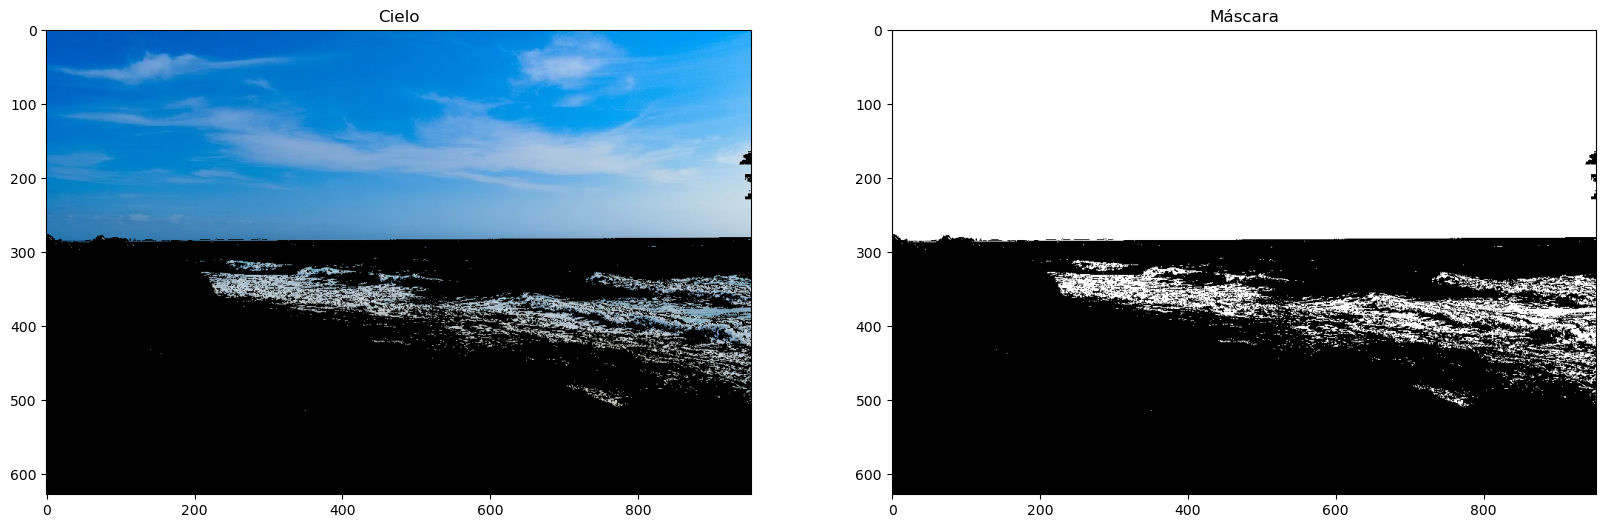

In [64]:
color_l = (0,30,170)
color_u = (235,220,255)

mask = cv.inRange(imgRGB, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

# plt.figure(6)
# plt.imshow(img_segmentada)
# plt.show()

plt.figure()
fig, s_plots = plt.subplots(1,2,figsize=(20,8)) 

s_plots[0].set_title('Cielo')
s_plots[0].imshow(img_segmentada)

s_plots[1].set_title('Máscara de Cielo')
s_plots[1].imshow(mask,cmap='gray')

plt.show()

<Figure size 640x480 with 0 Axes>

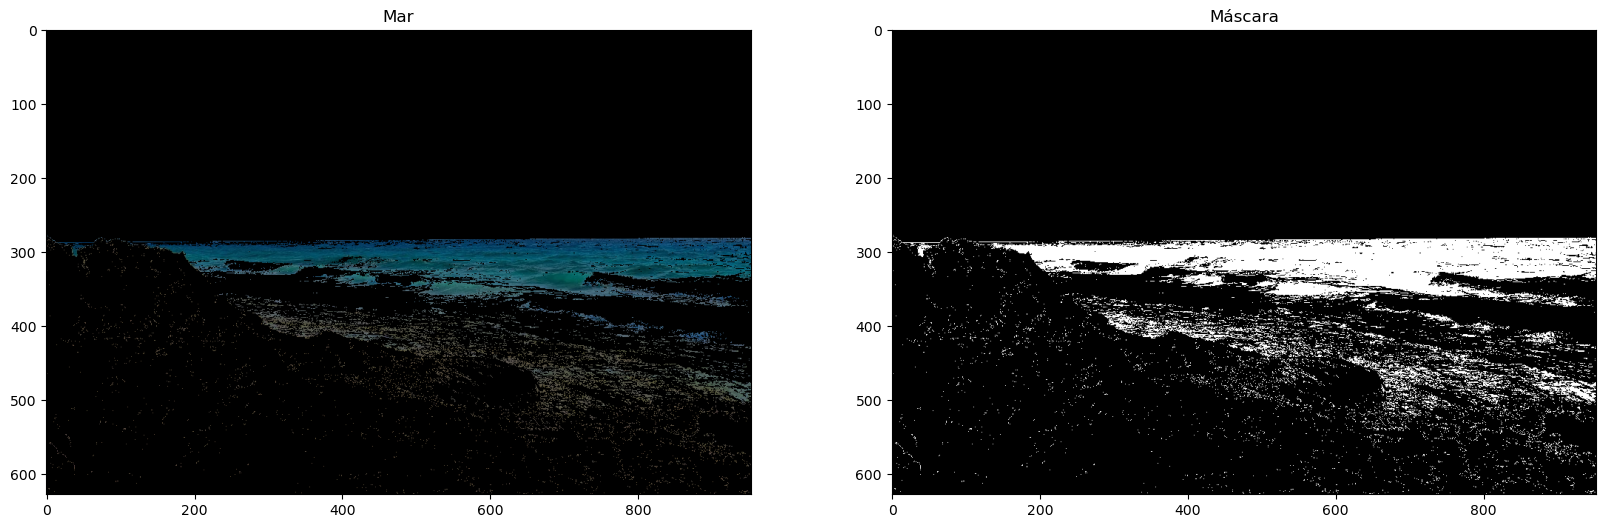

In [70]:
# Segmentacion del mar

color_l = (0,50,55)
color_u = (100,125,135)

mask = cv.inRange(imgRGB, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure()
fig, s_plots = plt.subplots(1,2,figsize=(20,8)) 

s_plots[0].set_title('Mar')
s_plots[0].imshow(img_segmentada)

s_plots[1].set_title('Máscara de Mar')
s_plots[1].imshow(mask,cmap='gray')

plt.show()

<Figure size 640x480 with 0 Axes>

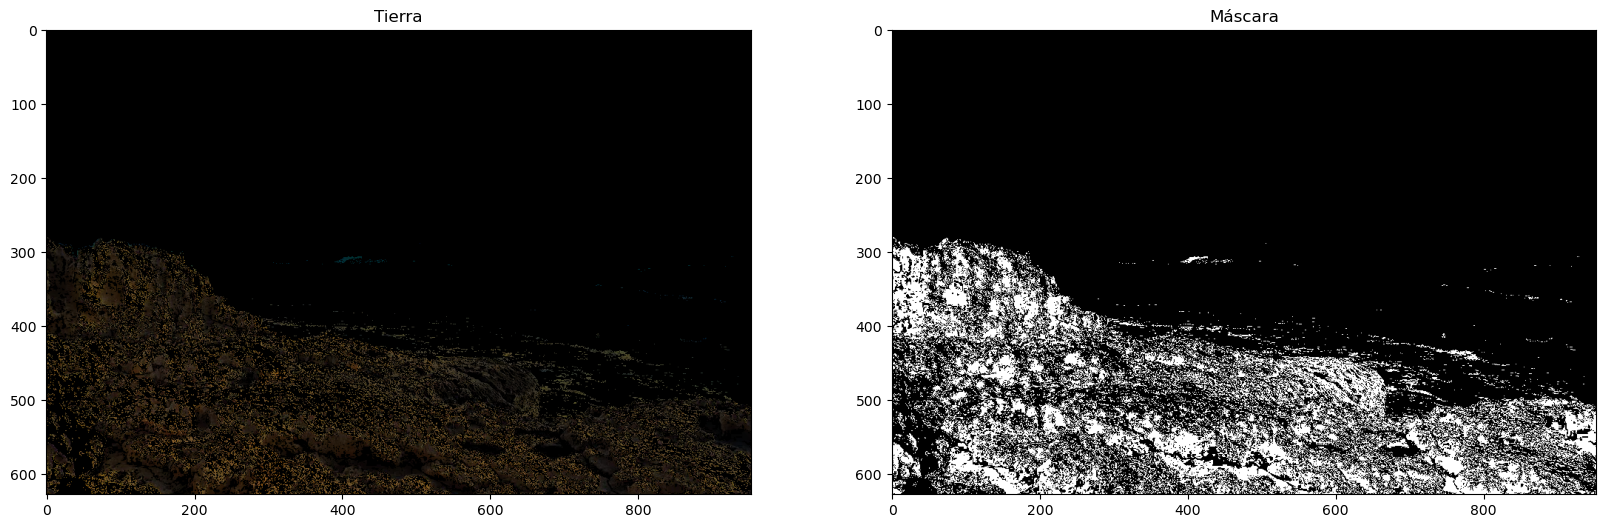

In [93]:
# Segmentacion de la tierra

color_l = (0,5,5)
color_u = (200,103,57)

mask = cv.inRange(imgRGB, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure()
fig, s_plots = plt.subplots(1,2,figsize=(20,8)) 

s_plots[0].set_title('Tierra')
s_plots[0].imshow(img_segmentada)

s_plots[1].set_title('Máscara de Tierra')
s_plots[1].imshow(mask,cmap='gray')

plt.show()

### Espacio de color HSV

Se realiza el mismo analisis para RGB

Tamaño imagen: (628, 953, 3) pix


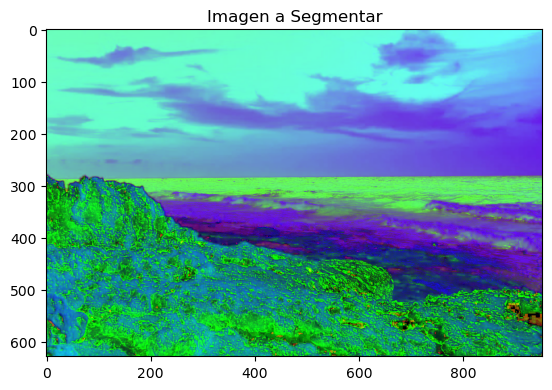

In [97]:

# Transformamos a HSV
imgHSV = cv.cvtColor(img_segment, cv.COLOR_BGR2HSV)

# Vemos el tamaño de la imagen
print(f'Tamaño imagen: {imgHSV.shape} pix')

plt.figure()
plt.title('Imagen a Segmentar')
plt.imshow(imgHSV),   
plt.show()

<Figure size 640x480 with 0 Axes>

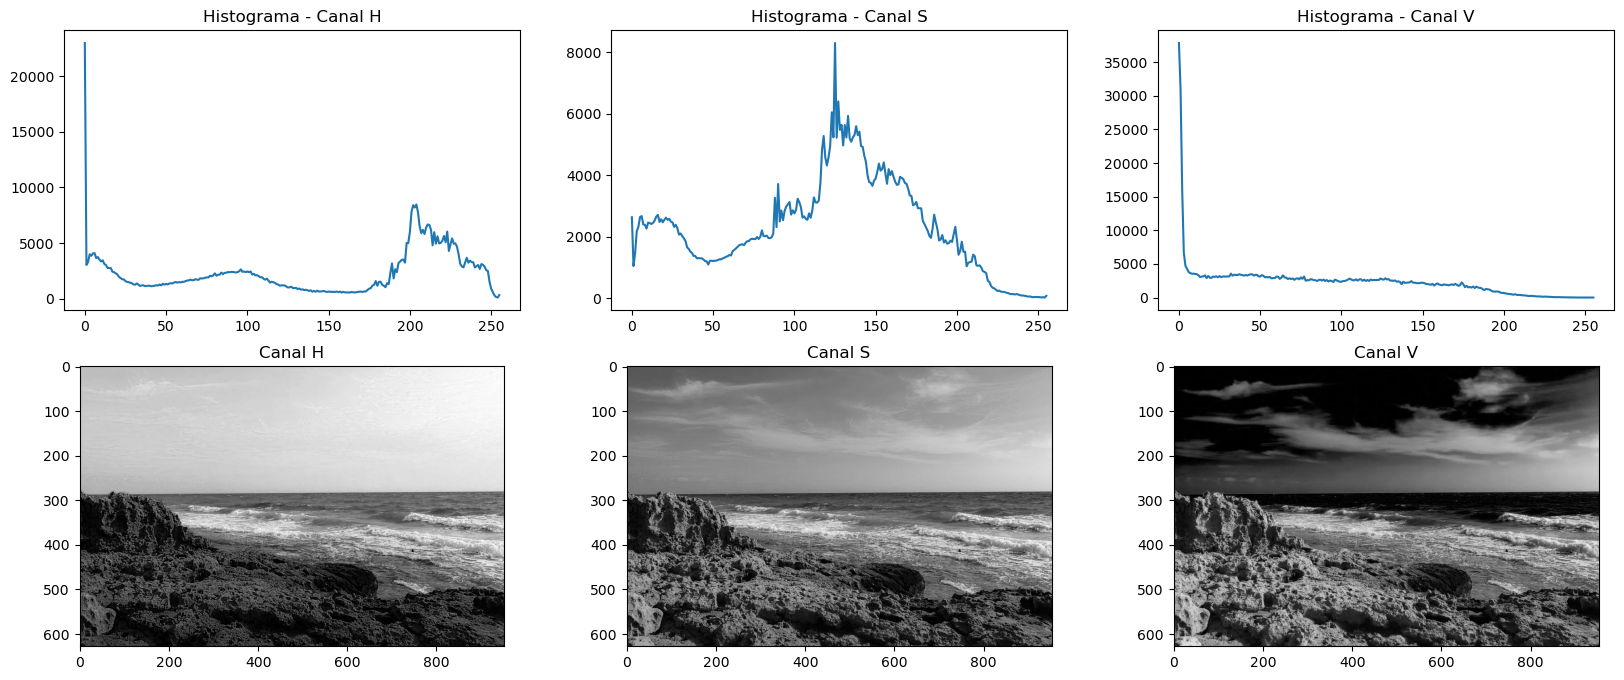

In [95]:
# Analisis de los histogramas de los tres canales y grafico de cada uno de ellos en escala de grises. 

im_h, im_s, im_v = cv.split(imgHSV)

plt.figure()
fig, s_plots = plt.subplots(2,3,figsize=(20,8)) 

hist_r,bins_r = np.histogram(im_h.ravel(),256,[0,256])
s_plots[0,0].set_title('Histograma - Canal H')
s_plots[0,0].plot(hist_r)

hist_g,bins_g = np.histogram(im_s.ravel(),256,[0,256])
s_plots[0,1].set_title('Histograma - Canal S')
s_plots[0,1].plot(hist_g)

hist_b,bins_b = np.histogram(im_v.ravel(),256,[0,256])
s_plots[0,2].set_title('Histograma - Canal V')
s_plots[0,2].plot(hist_b)

s_plots[1,0].imshow(im_h,cmap='gray')
s_plots[1,0].set_title('Canal H')

s_plots[1,1].imshow(im_s,cmap='gray')
s_plots[1,1].set_title('Canal S')

s_plots[1,2].imshow(im_v,cmap='gray')
s_plots[1,2].set_title('Canal V')

plt.show()
